# 01: Global Fits

In [1]:
import SMEFT19
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from flavio.statistics.functions import pull
import warnings

/home/jorge/.cache/pypoetry/virtualenvs/banomalies-ml-24-q3wM3yKA-py3.10/lib/python3.10/site-packages/smelli/classes.py:174: UserWarning: There was a problem loading the SM covariances. Please recompute them with `make_measurement`.
  warnings.warn("There was a problem loading the SM covariances. "
/home/jorge/.cache/pypoetry/virtualenvs/banomalies-ml-24-q3wM3yKA-py3.10/lib/python3.10/site-packages/ckmutil/ckm.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
  c12 = cos(t12)
/home/jorge/.cache/pypoetry/virtualenvs/banomalies-ml-24-q3wM3yKA-py3.10/lib/python3.10/site-packages/ckmutil/ckm.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
  c23 = cos(t23)
/home/jorge/.cache/pypoetry/virtualenvs/banomalies-ml-24-q3wM3yKA-py3.10/lib/python3.10/site-packages/ckmutil/ckm.py:26: ComplexWarning: Casting complex values to real discards the imaginary part
  s12 = sin(t12)
/home/jorge/.cache/pypoetry/virtualenvs/banomalies-ml-24-q3wM

In [3]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    SMEFT19.SMEFTglob.gl.make_measurement()

In [ ]:
def fit_I(x):
    return -SMEFT19.likelihood_global(x, SMEFT19.scenarios.rotBI)

In [ ]:
bf, v, d, L = SMEFT19.ellipse.minimum(fit_I, [-0.13, 0, 0.851])

In [ ]:
SMEFT19.__path__

In [ ]:
SMEFT19.SMEFTglob.likelihood_fits([-0.13, 0, 0.851], SMEFT19.scenarios.rotBI)

In [ ]:
d1 = {5: 'a', 7: 'b', 4.3: 'c'}

In [ ]:
d1[4.3]

In [ ]:
SMEFT19.scenarios.rotBI([-0.13, 0, 0.851]).wc.values.keys()

In [ ]:
from wilson import Wilson

In [ ]:
from collections import defaultdict

In [ ]:
d = defaultdict(float)

In [ ]:
d['a'] += 7

In [ ]:
d['a']

In [ ]:
d['b'] -= 2.3

In [ ]:
d['b']

In [ ]:
dict(d)

In [ ]:
cache_running = {125.0: {}, 91.1876: {}, 4.8: {}, 1.8: {} }

In [ ]:
fit_scale = {'fast_likelihood_quarks.yaml': 4.8,
                 'fast_likelihood_leptons.yaml': 1.8,
                 'likelihood_ewpt.yaml': 91.1876,
                 'likelihood_eeww.yaml': 91.1876,
                 'likelihood_lept.yaml': 1.8,
                 'likelihood_rd_rds.yaml': 4.8,
                 'likelihood_lfu_fccc.yaml': 4.8,
                 'likelihood_lfu_fcnc.yaml': 4.8,
                 'likelihood_bcpv.yaml': 4.8,
                 'likelihood_bqnunu.yaml': 4.8,
                 'likelihood_lfv.yaml': 4.8,
                 'likelihood_zlfv.yaml': 91.1876,
                 'likelihood_higgs.yaml': 125.0
                 }

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    glfit = {}
    for fit in fit_scale.keys():
            scale = fit_scale[fit]
            if scale > 80:
                eft = 'SMEFT'
                basis = 'Warsaw'
            else:
                eft = 'WET'
                basis = 'flavio'
            glfit[fit] = smelli.GlobalLikelihood(eft=eft, include_likelihoods=[fit,])
            glfit[fit].make_measurement()

In [ ]:
import smelli

In [ ]:
def likelihood_fits_cached(x, wfun):
    global cache_running
    res = {}
    for fit in fit_scale.keys():
        scale = fit_scale[fit]
        if scale > 80:
            eft = 'SMEFT'
            basis = 'Warsaw'
        else:
            eft = 'WET'
            basis = 'flavio'
        w0 = wfun(x)
        wc_res = defaultdict(float)
        for wc in w0.wc.values.keys():
            if wc not in cache_running[scale].keys():
                cache_running[scale][wc] = Wilson({wc: 1e-6}, scale=1e3, basis='Warsaw', eft='SMEFT').match_run(scale=scale, eft=eft, basis=basis).values
            for w in cache_running[scale][wc].keys():
                if isinstance(cache_running[scale][wc][w], float):
                    wc_res[w] += cache_running[scale][wc][w]/1e-6 * w0.wc.values[wc]
                else:
                    wc_res[w] += (cache_running[scale][wc][w]['Re']+cache_running[scale][wc][w]['Im'])/1e-6 * w0.wc.values[wc]
        res[fit] = glfit[fit].parameter_point(Wilson(dict(wc_res), scale=scale, eft=eft, basis=basis )).log_likelihood_global()
    res['global'] = sum(res[fit] for fit in fit_scale.keys())
    return res

In [ ]:
t0 = time.time()
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    l1 = likelihood_fits_cached([-0.13, 0, 0.851], SMEFT19.scenarios.rotBI)
tf = time.time()

In [ ]:
import time

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    print(l1['fast_likelihood_quarks.yaml'].log_likelihood_global())

In [ ]:
tf-t0

In [ ]:
l1['global']

In [ ]:
def fit_I(x):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        return -likelihood_fits_cached(x, SMEFT19.scenarios.rotBI)['global']

In [ ]:
bf_I, v_I, d_I, L_I = SMEFT19.ellipse.minimum(fit_I, [-0.13, 0, 0.851])

In [ ]:
cache_running

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from flavio.statistics.functions import pull
import warnings
from flavio.statistics.functions import pull, delta_chi2, pvalue
from SMEFT19 import likelihood_global
from SMEFT19.scenarios import rotBIII
warnings.simplefilter("ignore")


In [3]:
def fit_II(x):
    try:
        return -SMEFT19.likelihood_global(x, SMEFT19.scenarios.rotBIII)
    except:
        return -2000

In [4]:
fit_II([0, 0, 0])

-0.0

In [8]:
fit_II([-0.11, -0.11, 0.78])

-24.50348422150495

In [7]:
def fit_I(x):
    return -SMEFT19.likelihood_global(x, SMEFT19.scenarios.rotBI)

In [ ]:
fit_I([-0.11, 0, 0.78])

In [3]:
import smelli

In [ ]:
gl = smelli.GlobalLikelihood()
gl.make_measurement()

In [39]:
import yaml

glSM = gl.parameter_point({}, scale=1000)
obsSM = glSM.obstable()
obscoll = list(obsSM['pull exp.'].keys())
for o in obscoll:
    if isinstance(o, tuple):
        o = list(o)
with open('../observables.yaml', 'wt', encoding='utf-8') as fyaml:
    yaml.safe_dump(obscoll, fyaml)

In [9]:
import warnings
warnings.simplefilter("ignore")

In [40]:
from scenarios import rotBIII

bf = [-0.1023464, -0.11863709, 0.9034919 ]
w = rotBIII(bf)

glNP = gl.parameter_point(w)
glSM = gl.parameter_point({}, scale=1000)
obsSM = glSM.obstable()
obsNP = glNP.obstable()

In [41]:
import re 
import flavio

def texnumber(x, prec=3):
    r'''
Returns the TeX representation of a number in scientific notation.
    '''
    texn = ('{:.'+str(prec)+'g}').format(float(x))
    match = re.match(r'(-?[0-9]+(\.[0-9]+)?)e(.[0-9]+)', texn)
    if match:
        texn = '$' + match.group(1) + '\\times 10^{' + str(int(match.group(3))) + '}$'
    return texn

def tex(obs):
    r'''
Returns the TeX representation for a given flavio observable.
If the observable includes arguments (e. g. q2), they are represented as superindex.
    '''
    if isinstance(obs, str):
        text = flavio.Observable[obs].tex
    else:
        text = (flavio.Observable[obs[0]].tex[:-1] + '^{' +
                str(list(obs[1:])).replace(',', ',\\ ') + '}$')
    return text.replace('text', 'mathrm')

f = open('rotBIII.tex', 'wt', encoding='utf-8')
obsnum = 0
f.write('\\begin{longtable}{|c|c|c|c|c|}\\hline\n & Observable &\t NP prediction '+
        '&\t NP pull & SM pull\\endhead\\hline\n')
for obs in obscoll:
    if isinstance(obs, list):
        obs = tuple(obs)
    NPpull = float(obsNP.loc[[obs], 'pull exp.'])
    SMpull = float(obsSM.loc[[obs], 'pull exp.'])
    if NPpull > SMpull:
        col = int(min(50, 50*(NPpull-SMpull)))
        f.write(f'{obsnum} &\t {tex(obs)} &\t {texnumber(obsNP.loc[[obs], "theory"], 5)} &'+
                f'\t \cellcolor{{red!{col}}}{texnumber(NPpull, 2)} $ \sigma$ &\t '+
                f'{texnumber(SMpull, 2)} $ \sigma$ \\\\ \hline\n')
    elif SMpull > NPpull:
        col = int(min(50, 50*(SMpull-NPpull)))
        f.write(f'{obsnum} &\t {tex(obs)} &\t {texnumber(obsNP.loc[[obs], "theory"], 5)} &'+
                f'\t \cellcolor{{green!{col}}}{texnumber(NPpull, 2)} $ \sigma$ &\t '+
                f'{texnumber(SMpull, 2)} $ \sigma$ \\\\ \hline\n')
    else:
        f.write(f'{obsnum} &\t {tex(obs)} &\t {texnumber(obsNP.loc[[obs], "theory"], 5)} &'+
                f'\t {texnumber(NPpull, 2)} $ \sigma$ &\t {texnumber(SMpull, 2)} '+
                '$ \sigma$ \\\\ \hline\n')
    obsnum += 1
f.write(r'\end{longtable}')
f.close()

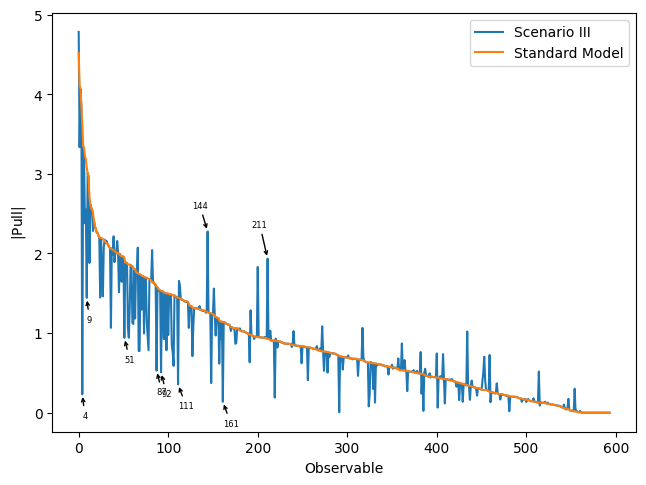

In [42]:
import matplotlib.pyplot as plt
plt.rcParams.update({'pgf.texsystem':'pdflatex'})

NP = []
SM = []
for obs in obscoll:
    if isinstance(obs, list):
        obs = tuple(obs)
    NP.append(float(obsNP.loc[[obs], 'pull exp.']))
    SM.append(float(obsSM.loc[[obs], 'pull exp.']))

fig = plt.figure()
plt.plot(NP, label='Scenario III')
plt.plot(SM, label='Standard Model')
vertplus = 0
vertminus = 0
sigmas = 1
for i, (SMi, NPi) in enumerate(zip(SM, NP)):
    if (NPi-SMi) > sigmas:
        v = 0.3 + vertplus
        vertplus += 0.1
        plt.annotate(str(i), xy=(i, NPi), xytext=(i, NPi+v), fontsize=6,
                        horizontalalignment='right',
                        arrowprops=dict(facecolor='black', arrowstyle='->'))
    elif (SMi-NPi) > sigmas:
        v = 0.3 + vertminus
        #vertminus += 0.1
        plt.annotate(str(i), xy=(i, NPi), xytext=(i, NPi-v), fontsize=6,
                        horizontalalignment='left',
                        arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.xlabel('Observable')
plt.ylabel(r'$|$Pull$|$')
plt.legend(loc=1)
plt.tight_layout(pad=0.5)
fig.savefig('rotBIII.pdf')

In [19]:
from scenarios import idemp

In [20]:
idemp(0, bf[2])

matrix([[0.        , 0.        , 0.        ],
        [0.        , 0.44942944, 0.49743604],
        [0.        , 0.49743604, 0.55057056]])

In [22]:
w_low = w.match_run(scale=4.8, basis='flavio', eft='WET')

In [23]:
w_low['CVL_bctaunutau']

(0.08872214241326881-2.2863763264296097e-06j)

In [24]:
w_low['CVR_bctaunutau']

0

In [25]:
w_low['CSL_bctaunutau']

(1.2756652345188523e-07-2.9133212699958064e-12j)

In [26]:
w_low['CSR_bctaunutau']

(-1.013985238152431e-06+3.292696311805009e-11j)

In [27]:
w_low['CT_bctaunutau']

(-2.1127549986382166e-08+4.825038661607983e-13j)

In [34]:
w_low['CL_bsnutaunutau']*(-0.08287)

(0.616022748031058+0.011318002380635902j)

In [29]:
w_low['CR_bsnutaunutau']

(3.544926270264555e-06+6.50666915006711e-08j)

In [30]:
w_low['CL_bsnumunumu']

(0.0002116658592473824+3.890076195786354e-06j)

In [31]:
w_low['CL_bsnuenue']

(0.0002116658592473824+3.890076195786354e-06j)

In [32]:
w_low['CVL_bcmunumu']

(-2.8550958603507304e-07+6.227017760596083e-12j)

In [35]:
w_low['C9_bsmumu']

(-0.5764847945720568-0.01059187122654822j)

In [36]:
w_low['C9_bsee']

(-0.5764847945720568-0.010591871226548219j)

In [37]:
w_low['C10_bsmumu']

(-0.0017818713997265257-3.274791476685417e-05j)

In [38]:
w_low['C10_bsee']

(-0.001781871399726526-3.2747914766852365e-05j)